In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mapclassify import Quantiles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [5]:
df = pd.read_csv('gdp_over_hours_worked.csv')

In [6]:
# Print the first few rows of the DataFrame
print(df.head())

  iso2c  year     country iso3c          pop  labor_force  gdp_ppp_c  gdp_ppp  \
0    1A  1980  Arab World   ARB  167707208.0          NaN        NaN      NaN   
1    1A  1981  Arab World   ARB  173118753.0          NaN        NaN      NaN   
2    1A  1982  Arab World   ARB  178587926.0          NaN        NaN      NaN   
3    1A  1983  Arab World   ARB  184342569.0          NaN        NaN      NaN   
4    1A  1984  Arab World   ARB  190162096.0          NaN        NaN      NaN   

            gdp         gdp_c  ...  employed  total_hours_alternative  \
0  4.598046e+11  8.594801e+11  ...       NaN                      NaN   
1  4.748121e+11  8.884793e+11  ...       NaN                      NaN   
2  4.445759e+11  8.148883e+11  ...       NaN                      NaN   
3  4.184621e+11  7.643004e+11  ...       NaN                      NaN   
4  4.258994e+11  7.744464e+11  ...       NaN                      NaN   

   gdp_over_k_hours_worked  gdp_ppp_over_k_hours_worked  gdp_over_pop  \
0

In [7]:
df.describe()

,year,pop,labor_force,gdp_ppp_c,gdp_ppp,gdp,gdp_c,unemployment_r,pop_over_65,working_age_pop_pct,...,employed,total_hours_alternative,gdp_over_k_hours_worked,gdp_ppp_over_k_hours_worked,gdp_over_pop,gdp_ppp_over_pop,gdp_ppp_over_labor_force,gdp_ppp_over_pop_c,gdp_over_pop_c,gdp_ppp_over_k_hours_worked_c
count,11560.000000,1.150700e+04,7.861000e+03,7.774000e+03,7.816000e+03,1.032200e+04,1.007800e+04,7623.000000,11517.000000,2236.000000,...,1.718000e+03,9.340000e+02,1695.000000,1436.000000,10322.000000,7816.000000,7304.000000,7774.000000,10078.000000,1436.000000
mean,2001.056228,2.471429e+08,1.304195e+08,3.280849e+12,2.937052e+12,1.507038e+12,1.786821e+12,8.073219,7.097829,65.831278,...,3.611168e+07,3.309809e+10,29418.919194,34270.538139,10463.766240,14881.493293,31482.118562,17044.809523,12032.907256,41450.681832
std,12.402936,7.954097e+08,3.967616e+08,1.054224e+13,1.007733e+13,6.115514e+12,6.462054e+12,5.712513,5.049777,3.340144,...,8.923382e+07,5.531914e+10,26106.410919,23598.924501,18560.435350,18251.548059,33788.905920,19222.376322,18737.352512,24587.410327
min,1980.000000,7.598000e+03,3.270400e+04,2.482164e+07,1.465840e+07,8.824746e+06,2.156211e+07,0.095000,0.171770,51.281287,...,1.110611e+05,2.542552e+08,3.096593,9.474523,22.850371,284.250421,605.072805,436.376416,165.934373,12.406395
25%,1990.000000,1.307206e+06,1.249457e+06,1.785945e+10,1.371533e+10,3.802561e+09,5.876908e+09,4.130000,3.293985,64.411816,...,2.449125e+06,3.836695e+09,9089.926685,17180.461906,941.049933,3048.578428,8025.509420,3699.080097,1508.107732,22967.012066
50%,2001.000000,7.863944e+06,4.674812e+06,1.000981e+11,8.562377e+10,2.511871e+10,3.771751e+10,6.476838,4.916974,66.256238,...,5.091772e+06,8.266769e+09,22525.195566,32172.506871,3059.074441,8073.917881,19490.218562,10010.717397,4064.820947,40938.805602
75%,2012.000000,5.078428e+07,3.192777e+07,1.041086e+12,8.746873e+11,3.161215e+11,4.360304e+11,10.557000,10.127006,67.861732,...,2.352300e+07,3.984082e+10,43431.007663,47490.340113,11171.862688,19557.269825,43107.793647,23448.813094,14240.171904,59101.060752
max,2022.000000,7.951150e+09,3.455349e+09,1.390333e+14,1.641553e+14,1.005620e+14,8.974581e+13,38.800000,35.970125,73.885367,...,6.588299e+08,2.788546e+11,138534.229164,152929.632512,234317.084818,163219.491990,274446.363413,157602.482546,204190.973407,137222.254006


In [8]:
# Find missing values in the DataFrame
print(df.isnull().sum())

iso2c                              165
year                                 0
country                              0
iso3c                              215
pop                                 53
labor_force                       3699
gdp_ppp_c                         3786
gdp_ppp                           3744
gdp                               1238
gdp_c                             1482
unemployment_r                    3937
pop_over_65                         43
working_age_pop_pct               9324
employment_rate                  10590
hours_worked                      9948
total_hours                       9840
hours_per_employed                9842
employed                          9842
total_hours_alternative          10626
gdp_over_k_hours_worked           9865
gdp_ppp_over_k_hours_worked      10124
gdp_over_pop                      1238
gdp_ppp_over_pop                  3744
gdp_ppp_over_labor_force          4256
gdp_ppp_over_pop_c                3786
gdp_over_pop_c           

In [9]:
df.fillna(0, inplace=True)
print(df.isnull().sum())

iso2c                            0
year                             0
country                          0
iso3c                            0
pop                              0
labor_force                      0
gdp_ppp_c                        0
gdp_ppp                          0
gdp                              0
gdp_c                            0
unemployment_r                   0
pop_over_65                      0
working_age_pop_pct              0
employment_rate                  0
hours_worked                     0
total_hours                      0
hours_per_employed               0
employed                         0
total_hours_alternative          0
gdp_over_k_hours_worked          0
gdp_ppp_over_k_hours_worked      0
gdp_over_pop                     0
gdp_ppp_over_pop                 0
gdp_ppp_over_labor_force         0
gdp_ppp_over_pop_c               0
gdp_over_pop_c                   0
gdp_ppp_over_k_hours_worked_c    0
dtype: int64


In [10]:
# Print the summary statistics of the DataFrame
print(df.describe())

               year           pop   labor_force     gdp_ppp_c       gdp_ppp  \
count  11560.000000  1.156000e+04  1.156000e+04  1.156000e+04  1.156000e+04   
mean    2001.056228  2.460098e+08  8.868752e+07  2.206343e+12  1.985813e+12   
std       12.402936  7.937597e+08  3.327840e+08  8.781100e+12  8.399318e+12   
min     1980.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%     1990.000000  1.243764e+06  0.000000e+00  0.000000e+00  0.000000e+00   
50%     2001.000000  7.697828e+06  1.372777e+06  1.857994e+10  1.505961e+10   
75%     2012.000000  5.020444e+07  1.035002e+07  3.164247e+11  2.646143e+11   
max     2022.000000  7.951150e+09  3.455349e+09  1.390333e+14  1.641553e+14   

                gdp         gdp_c  unemployment_r   pop_over_65  \
count  1.156000e+04  1.156000e+04    11560.000000  11560.000000   
mean   1.345645e+12  1.557749e+12        5.323715      7.071427   
std    5.797510e+12  6.063096e+12        6.013061      5.058864   
min    0.000000e+00 

Unmatched countries:
['Arab World' 'World' 'East Asia & Pacific (excluding high income)'
 'Europe & Central Asia (excluding high income)' 'South Asia' 'Andorra'
 'Antigua and Barbuda' 'American Samoa' 'Aruba'
 'Central Europe and the Baltics' 'Bosnia' 'Barbados' 'Bahrain' 'Bermuda'
 'Brunei Darussalam' 'Democratic Republic of the Congo'
 'Central African Republic' 'Republic of the Congo' 'Ivory Coast'
 'Cabo Verde' 'Curacao' 'Dominica' 'Dominican Republic' 'European Union'
 'Fragile and conflict affected situations' 'Micronesia' 'Faroe Islands'
 'UK' 'Grenada' 'Gibraltar' 'Equatorial Guinea' 'Guam' 'Hong Kong'
 'Isle of Man' 'Jersey' 'Kiribati' 'Comoros' 'Saint Kitts and Nevis'
 'Cayman Islands' 'St. Lucia' 'Liechtenstein' 'Monaco' 'Saint Martin'
 'Marshall Islands' 'Macao' 'Northern Mariana Islands' 'Malta' 'Mauritius'
 'Maldives' 'Nauru' 'OECD members' 'French Polynesia' 'West Bank and Gaza'
 'Palau' 'Small states' 'Pacific island small states'
 'Caribbean small states' 'Other small 

/tmp/ipykernel_2767/1848482537.py:42: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


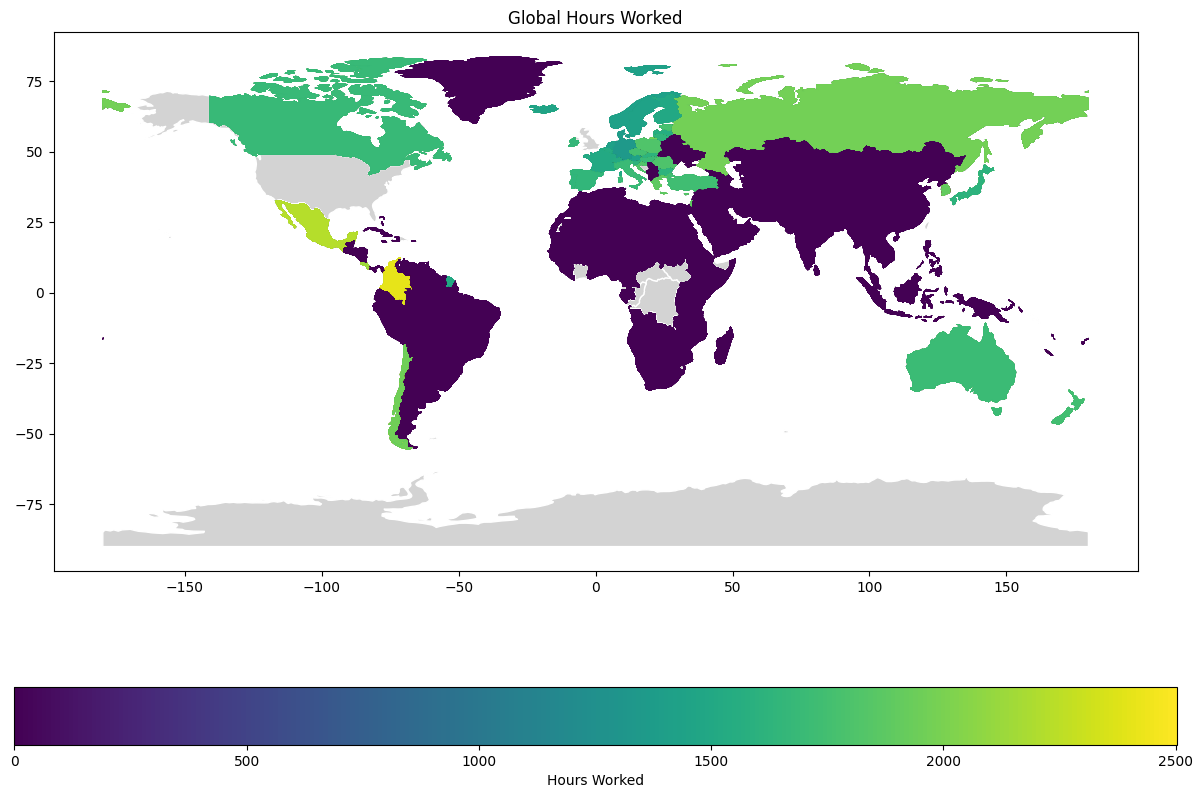

In [11]:
name_mapping = {
    "United States": "USA",
    "United Kingdom": "UK",
    "Russian Federation": "Russia",
    "Korea, North": "North Korea",
    "Korea, Dem. People's Rep.": "North Korea",
    "Korea, Rep.": "South Korea",
    "Turkiye": "Turkey",
    "Egypt, Arab Rep.": "Egypt",
    "Iran, Islamic Rep.": "Iran",
    "Venezuela, RB": "Venezuela",
    "Syrian Arab Republic": "Syria",
    "Yemen, Rep.": "Yemen",
    "Kyrgyz Republic": "Kyrgyzstan",
    "Lao PDR": "Laos",
    "Macao SAR, China": "Macao",
    "Hong Kong SAR, China": "Hong Kong",
    "Gambia, The": "Gambia",
    "Bahamas, The": "Bahamas",
    "Congo, Dem. Rep.": "Democratic Republic of the Congo",
    "Congo, Rep.": "Republic of the Congo",
    "Slovak Republic": "Slovakia",
    "St. Martin (French part)": "Saint Martin",
    "St. Kitts and Nevis": "Saint Kitts and Nevis",
    "St. Vincent and the Grenadines": "Saint Vincent and the Grenadines",
    "Micronesia, Fed. Sts.": "Micronesia",
    "Euro area": "Eurozone",
    "Cote d'Ivoire": "Ivory Coast",
    "Channel Islands": "Jersey",  # or Guernsey depending on context
    "Bosnia and Herzegovina": "Bosnia"
}


# Map data for Arab countries specifically if labeled as "Arab World" in your dataset


# Apply the mapping to your country column
# Assuming the country column in your dataset is named 'country'
df['country'] = df['country'].replace(name_mapping)

# Load a world map  
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge datasets
world = world.merge(df, how="left", left_on="name", right_on="country")

# Check for unmatched countries
unmatched_countries = df[~df['country'].isin(world['name'])]
print("Unmatched countries:")
print(unmatched_countries['country'].unique())

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
base = world.plot(ax=ax, color='lightgray', edgecolor='white')  # Use light gray for countries not in the dataset
world.dropna(subset=['hours_worked']).plot(ax=base, column='hours_worked', cmap='viridis', legend=True,
                                           legend_kwds={'label': "Hours Worked", 'orientation': "horizontal"})

plt.title('Global Hours Worked')
plt.show()

In [13]:
features = df[['pop', 'gdp', 'labor_force', 'unemployment_r', 'employment_rate', 'employed']].dropna()
target = df['gdp_over_k_hours_worked'][features.index]  # Ensure alignment of features and target

# Scaling features - Random Forest doesn't require scaling, but it's good practice
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
predictions = rf_model.predict(X_test)

# Evaluate the model
r2 = rf_model.score(X_test, y_test)
mse = mean_squared_error(y_test, predictions)

print("R-squared (Model Accuracy):", r2)
print("Mean Squared Error:", mse)

R-squared (Model Accuracy): 0.9887426117472761
Mean Squared Error: 2332283.2953377315
